<h1 align=center><font size = 5>Suggesting Stations for the Silver Line project, Kerala</font></h1>

## Problem Description

The Semi High Speed Rail (Silver Line) corridor runs 532km, connecting the north end and the south end of the state. It reduces the total travel time between Thiruvananthapuram and Kasargod to less than 4 hours, which is currently 12 hours.
                        
Here, I examine the tentative alignment proposed by k-rail and try to cluster the popular venues of the state to suggest potential stations for the Silver Line project.

## Table of Contents

1. <a href="#item1">Import Libraries</a>  
2. <a href="#item2">Data Collection</a>  
    2.1 <a href="#item2-1">Main Railway Centres in Kerala with their geographical coordinates</a>  
    2.2 <a href="#item2-2">Current Stations of K-Rail along with their coordinates</a>  
    2.3 <a href="#item2-3">Plot of Current Stations main District Centres through which K-Rail runs</a>  
    2.4 <a href="#item2-4">Get nearby locations of districts through which K-Rail runs</a>  
3. <a href="#item3">Data Preprocessing</a>  
    3.1 <a href="#item3-1">Plot all nearby sites on the map</a>
4. <a href="#item4">Determining the number of stations required using elbow method</a>  
5. <a href="#item5">Explore Districts through which K-Rail runs</a>  
    5.1 <a href="#item5-1">Frquency of popular sites</a>
6. <a href="#item6">k-means Clustering</a>  
    6.1 <a href="#item6-1">Explore Clusters</a>  
    6.2 <a href="#item6-2">Plot of Cluster Centroids on map</a>  
    6.3 <a href="#item6-3">Plot of Cluster Centroids and current stations on map</a>  
    6.4 <a href="#item6-4">Plot of Clusters with Centroid on map</a>  
   


<div id="item1"></div>
### Import necessary Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import os
from dotenv import load_dotenv #library to load .env
load_dotenv()

from collections import defaultdict

print('Libraries imported.')

Libraries imported.


In [2]:
CLIENT_ID = os.getenv('CLIENT_ID') # your Foursquare ID
CLIENT_SECRET = os.getenv('CLIENT_SECRET') # your Foursquare Secret
VERSION = '20180604' # api version
LIMIT = 100 # limit of number of venues returned by Foursquare API

print('Foursquare api configured.')

Foursquare api configured.


In [3]:
address = 'Kerala'

geolocator = Nominatim(user_agent="kerala_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinates of Kerala are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Kerala are 10.3528744, 76.5120396.


<div id="item2"></div>
### Import Data

<div id="item2-1"></div>
##### Main Railway Centres in Kerala with their geographical coordinates

In [4]:
rail_dists = ['Thiruvananthapuram',
              'Kollam',
              'Chengannur',
              'Kottayam',
              'Ernakulam',
              'Thrissur',
              'Shornur',
              'Tirur',
              'Kozhikode',
              'Kannur',
              'Kasargod'
             ]
lats, longs = [], []

for i in rail_dists:
    location = geolocator.geocode(i)
    lats.append(location.latitude)
    longs.append(location.longitude)

rail_dists_df = pd.DataFrame({'District':rail_dists,'Latitude':lats,'Longitude':longs})
rail_dists_df

,District,Latitude,Longitude
0,Thiruvananthapuram,8.505891,76.957048
1,Kollam,8.887054,76.590706
2,Chengannur,9.316710,76.609589
3,Kottayam,9.628570,76.645525
4,Ernakulam,10.038395,76.507415
5,Thrissur,10.525626,76.213254
6,Shornur,10.708266,76.279462
7,Tirur,10.904113,76.003676
8,Kozhikode,11.244614,75.775937
9,Kannur,11.876225,75.373804


<div id="item2-2"></div>
##### Current Stations of K-Rail along with their coordinates
- Coordinates collected from https://keralarail.com

In [5]:
current_stations = ['Thiruvananthapuram',
                    'Kollam',
                    'Chengannur',
                    'Kottayam',
                    'Ernakulam',
                    'Nedumbassery Airport',
                    'Thrissur',
                    'Tirur',
                    'Kozhikode',
                    'Kannur',
                    'Kasargod'
                   ]
current_lats = ['8.512484', '8.895697', '9.30796', '9.575951', '10.013881', '10.156106', '10.508701', '10.946222', '11.247139', '11.871956', '12.491']
current_longs = ['76.897399', '76.6571', '76.640657', '76.538539', '76.37704', '76.38084', '76.205463', '75.902405', '75.779692', '75.369156', '74.986658']

current_stations_df = pd.DataFrame({'Station':current_stations,'Latitude':current_lats,'Longitude':current_longs})
current_stations_df

,Station,Latitude,Longitude
0,Thiruvananthapuram,8.512484,76.897399
1,Kollam,8.895697,76.6571
2,Chengannur,9.30796,76.640657
3,Kottayam,9.575951,76.538539
4,Ernakulam,10.013881,76.37704
5,Nedumbassery Airport,10.156106,76.38084
6,Thrissur,10.508701,76.205463
7,Tirur,10.946222,75.902405
8,Kozhikode,11.247139,75.779692
9,Kannur,11.871956,75.369156


<div id="item2-3"></div>
##### Plot of Current Stations main District Centres through which K-Rail runs
- red : Current Station
- blue : District Centre

In [6]:
# create map of Kerala using latitude and longitude values
map_kerala_current_stations = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(current_stations_df['Latitude'], current_stations_df['Longitude'], current_stations_df['Station']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kerala_current_stations)  

for lat, lng, label in zip(rail_dists_df['Latitude'], rail_dists_df['Longitude'], rail_dists_df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kerala_current_stations)  
    
map_kerala_current_stations

<div id="item2-4"></div>
##### Get nearby locations of districts through which K-Rail runs

In [7]:
places_categories = ['4bf58dd8d48988d1eb931735', '4bf58dd8d48988d129951735', '4bf58dd8d48988d1fd931735', '56aa371be4b08b9a8d57353e', '530e33ccbcbc57f1066bbff3']
# airport-terminal,train,metro,port,town

def getNearbyVenues(names, latitudes, longitudes, radius=100000):
    venues_list = []
    venues_name = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, lat, lng)
        
        for category in places_categories:
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            category,
            LIMIT)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_name.append(v['venue']['name'] for v in results if v['venue']['name'] not in venues_name)
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],
                v['venue']['location']['distance'],
                v['venue']['categories'][0]['name']) for v in results if v['venue']['name'] not in venues_name])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Rail_District',
                  'District_Latitude',
                  'District_Longitude',
                  'Venue',
                  'Venue_Latitude',
                  'Venue_Longitude',
                  'Distance',
                  'Venue_Category']
    
    return(nearby_venues)

In [14]:
nearby_venues = getNearbyVenues(names=rail_dists_df['District'],
                                latitudes=rail_dists_df['Latitude'],
                                longitudes=rail_dists_df['Longitude']
                               )

Thiruvananthapuram 8.5058909 76.9570481
Kollam 8.8870537 76.5907058
Chengannur 9.3167099 76.6095886
Kottayam 9.62857045 76.6455250291479
Ernakulam 10.038394700000001 76.5074145180173
Thrissur 10.5256264 76.2132542
Shornur 10.7082662 76.2794622
Tirur 10.9041131 76.00367639990668
Kozhikode 11.2446144 75.7759372
Kannur 11.8762254 75.3738043
Kasargod 12.4914722 74.9877613


In [15]:
nearby_venues_bck = nearby_venues

<div id="item3"></div>
### Data Preprocessing

In [9]:
# Fix Kannur International Airport in nearby_venues
# Kannur International Airport seems not to be available in foursquare database

nearby_venues.loc[nearby_venues.Venue == 'Air India Express Operations']
nearby_venues.loc[nearby_venues.Venue == 'Air India Express Operations', 'Venue_Category'] = 'Airport'
nearby_venues.loc[nearby_venues.Venue == 'Air India Express Operations', 'Venue_Latitude'] = '11.9412723'
nearby_venues.loc[nearby_venues.Venue == 'Air India Express Operations', 'Venue_Longitude'] = '75.5496192'
nearby_venues.loc[nearby_venues.Venue == 'Air India Express Operations', 'Venue'] = 'Kannur International Airport'


In [10]:
# To assign airports to correct district

airports = {
    'Thiruvananthapuram': 'Trivandrum International Airport (TRV)',
    'Ernakulam': 'Cochin International Airport (COK) (Cochin International Airport)',
    'Kozhikode': 'Calicut International Airport',
    'Kannur': 'Kannur International Airport',
    'Kasaragod': 'Mangalore International Airport'
}

airports_reversed = {val: key for key, val in airports.items()}
airports_reversed

{'Calicut International Airport': 'Kozhikode',
 'Cochin International Airport (COK) (Cochin International Airport)': 'Ernakulam',
 'Kannur International Airport': 'Kannur',
 'Mangalore International Airport': 'Kasaragod',
 'Trivandrum International Airport (TRV)': 'Thiruvananthapuram'}

In [16]:
# To give appropriate weights to venues
weight = {
    'Train Station': 40,
    'Metro Station': 100,
    'Harbor / Marina': 150,
    'City': 10,
    'Beach': 10,
    'Town': 10,
    'Airport': 200
}

# Filter venues to specific categories
nearby_venues = nearby_venues[(nearby_venues.Venue_Category == 'Airport') |
                              (nearby_venues.Venue_Category == 'Train Station') |
                              (nearby_venues.Venue_Category == 'Metro Station') |
                              (nearby_venues.Venue_Category == 'Train Station') |
                              (nearby_venues.Venue_Category == 'Harbor / Marina') |
                              (nearby_venues.Venue_Category == 'City') |
                              (nearby_venues.Venue_Category == 'Beach') |
                              (nearby_venues.Venue_Category == 'Town')
                             ].reset_index()

aaa = np.array(nearby_venues)
aaa = sorted(aaa, key=lambda x: x[-2])

nearby_venues = []
names = []
# repeat = []

min_lat = defaultdict(float)

for i in aaa:
    min_lat[i[1]] = float(i[6]) if min_lat[i[1]] == 0.0 else min(min_lat[i[1]], float(i[6]))

for i in aaa:
#     print(i[-1])
    i = np.append(i, weight[i[-1]] * (100000.0 / i[-2]) * (int(float(i[6]) < (min_lat[i[1]] + 1)) + 0.01) )
    
    if i[-1] < 1:
        continue
    if i[-2] == 'Metro Station':
        if i[1] != 'Ernakulam':  #Metro available only in Ernakulam (Kerala)
            continue
        nearby_venues.append(i[1:])
    elif i[4] in airports_reversed:
        if i[1] != airports_reversed[i[4]]:
            continue
        nearby_venues.append(i[1:])
    else:
        if i[4] not in names:
            nearby_venues.append(i[1:])
#         else:
#             repeat.append(i[1:])
        names.append(i[4])
        
i = i[1:]
for dist, lat, lng in zip(list(rail_dists_df['District']), list(rail_dists_df['Latitude']), list(rail_dists_df['Longitude'])):
    i[0], i[3] = dist, dist
    i[1], i[2] = lat, lng
    i[4], i[5] = lat, lng
    i[6] = 0
    i[7] = 'District_Centre'
    i[8] = 10000.0
    nearby_venues.append(np.array(i))

# print(nearby_venues)

nearby_venues = sorted(nearby_venues, key=lambda x: x[1])

nearby_venues = pd.DataFrame(nearby_venues)
nearby_venues.columns = ['Rail_District', 
              'District_Latitude', 
              'District_Longitude', 
              'Venue', 
              'Venue_Latitude', 
              'Venue_Longitude',
              'Distance',
              'Venue_Category',
              'weight']

print(nearby_venues.shape)
# nearby_venues


(214, 9)


In [17]:
nearby_venues

,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
0,Thiruvananthapuram,8.505891,76.957048,Railway Computerised Reservation Centre,8.488794,76.948735,2111,Train Station,1913.784936
1,Thiruvananthapuram,8.505891,76.957048,Trivandrum Central Railway Station,8.486804,76.952201,2190,Train Station,1844.748858
2,Thiruvananthapuram,8.505891,76.957048,Thiruvananthapuram Railway Station Entrance 1,8.480112,76.956612,2870,Train Station,1407.665505
3,Thiruvananthapuram,8.505891,76.957048,Pettah Railway Station,8.494767,76.932209,3001,Train Station,1346.217927
4,Thiruvananthapuram,8.505891,76.957048,Trivandrum International Airport (TRV),8.483154,76.918116,4977,Airport,4058.669881
5,Thiruvananthapuram,8.505891,76.957048,Kochuveli Railway Station,8.510030,76.897409,6581,Train Station,613.888467
6,Thiruvananthapuram,8.505891,76.957048,Nemom,8.453368,77.003279,7752,Train Station,521.155831
7,Thiruvananthapuram,8.505891,76.957048,Nemam Railway Station,8.449941,77.015106,8924,Train Station,452.711788
8,Thiruvananthapuram,8.505891,76.957048,Kazhakuttam Railway Station,8.556835,76.872765,10874,Train Station,371.528416
9,Thiruvananthapuram,8.505891,76.957048,Nedumangad,8.604265,77.002728,12050,Town,83.817427


<div id="item3-1"></div>
##### Plot all nearby venues on the map

In [18]:
# create map of New York using latitude and longitude values
map_kerala = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nearby_venues['Venue_Latitude'], nearby_venues['Venue_Longitude'], nearby_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kerala)
    
map_kerala

<div id="item4"></div>
### Determining the number of stations required using elbow method

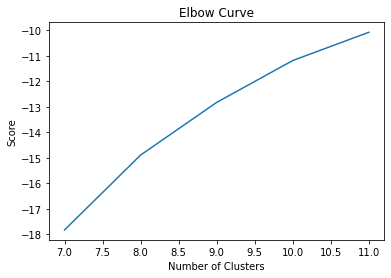

<function xlabel at 0x7faf77bb0840>


<module 'matplotlib.pyplot' from '/home/sreenathbs/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [20]:
# aaba = aab[(aab.Rail_District != 'Shornur')].reset_index()
# print(len(aab))

K_clusters = range(7,12)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
lats = np.array(nearby_venues[['Venue_Latitude']])
lngs = np.array(nearby_venues[['Venue_Longitude']])

X_axis = np.array(list(zip(lats, lngs))).reshape(len(lats), 2)
score = [kmeans[i].fit(X_axis).score(X_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

print(plt.xlabel)
plt


>I took the range (7 - 12) to determine the best cluster size. 7 is half the number of districts in Kerala and 12 because 11 is the number of district centres we took above. From this plot, the last observable elbow is around 10 in the x-axis.

>So, I take the <b>number of clusters, k = 10</b>

In [34]:
k = 10

<div id="item5"></div>
### Explore Districts through which K-Rail runs

In [21]:
nearby_venues.groupby('Rail_District').count()

,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
Rail_District,,,,,,,,
Chengannur,14,14,14,14,14,14,14,14
Ernakulam,39,39,39,39,39,39,39,39
Kannur,19,19,19,19,19,19,19,19
Kasargod,34,34,34,34,34,34,34,34
Kollam,15,15,15,15,15,15,15,15
Kottayam,16,16,16,16,16,16,16,16
Kozhikode,11,11,11,11,11,11,11,11
Shornur,17,17,17,17,17,17,17,17
Thiruvananthapuram,26,26,26,26,26,26,26,26


In [23]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue_Category'].unique())))

There are 8 uniques categories.


In [24]:
# one hot encoding
nearby_onehot = pd.get_dummies(nearby_venues[['Venue_Category']], prefix="", prefix_sep="")

# add station column back to dataframe
nearby_onehot['Rail_District'] = nearby_venues['Rail_District'] 

# move neighborhood column to the first column
fixed_columns = [nearby_onehot.columns[-1]] + list(nearby_onehot.columns[:-1])
nearby_onehot = nearby_onehot[fixed_columns]

nearby_onehot.head()

,Rail_District,Airport,Beach,City,District_Centre,Harbor / Marina,Metro Station,Town,Train Station
0,Thiruvananthapuram,0,0,0,0,0,0,0,1
1,Thiruvananthapuram,0,0,0,0,0,0,0,1
2,Thiruvananthapuram,0,0,0,0,0,0,0,1
3,Thiruvananthapuram,0,0,0,0,0,0,0,1
4,Thiruvananthapuram,1,0,0,0,0,0,0,0


<div id="item5-1"></div>
##### Frequency of popular sites

In [25]:
nearby_grouped = nearby_onehot.groupby('Rail_District').mean().reset_index()
nearby_grouped

,Rail_District,Airport,Beach,City,District_Centre,Harbor / Marina,Metro Station,Town,Train Station
0,Chengannur,0.000000,0.071429,0.142857,0.071429,0.000000,0.00000,0.142857,0.571429
1,Ernakulam,0.025641,0.051282,0.076923,0.025641,0.000000,0.25641,0.179487,0.384615
2,Kannur,0.000000,0.000000,0.052632,0.052632,0.000000,0.00000,0.210526,0.684211
3,Kasargod,0.000000,0.000000,0.029412,0.029412,0.000000,0.00000,0.529412,0.411765
4,Kollam,0.000000,0.000000,0.133333,0.066667,0.000000,0.00000,0.066667,0.733333
5,Kottayam,0.000000,0.000000,0.062500,0.062500,0.000000,0.00000,0.312500,0.562500
6,Kozhikode,0.090909,0.000000,0.090909,0.090909,0.000000,0.00000,0.181818,0.545455
7,Shornur,0.000000,0.000000,0.117647,0.058824,0.000000,0.00000,0.058824,0.764706
8,Thiruvananthapuram,0.038462,0.038462,0.038462,0.038462,0.038462,0.00000,0.038462,0.769231
9,Thrissur,0.000000,0.000000,0.071429,0.071429,0.000000,0.00000,0.142857,0.714286


In [26]:
nearby_grouped.shape

(11, 9)

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Rail_District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nearby_venues_sorted = pd.DataFrame(columns=columns)
nearby_venues_sorted['Rail_District'] = nearby_grouped['Rail_District']

for ind in np.arange(nearby_grouped.shape[0]):
    nearby_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nearby_grouped.iloc[ind, :], num_top_venues)

nearby_venues_sorted

,Rail_District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Chengannur,Train Station,Town,City,District_Centre,Beach,Metro Station,Harbor / Marina,Airport
1,Ernakulam,Train Station,Metro Station,Town,City,Beach,District_Centre,Airport,Harbor / Marina
2,Kannur,Train Station,Town,District_Centre,City,Metro Station,Harbor / Marina,Beach,Airport
3,Kasargod,Town,Train Station,District_Centre,City,Metro Station,Harbor / Marina,Beach,Airport
4,Kollam,Train Station,City,Town,District_Centre,Metro Station,Harbor / Marina,Beach,Airport
5,Kottayam,Train Station,Town,District_Centre,City,Metro Station,Harbor / Marina,Beach,Airport
6,Kozhikode,Train Station,Town,District_Centre,City,Airport,Metro Station,Harbor / Marina,Beach
7,Shornur,Train Station,City,Town,District_Centre,Metro Station,Harbor / Marina,Beach,Airport
8,Thiruvananthapuram,Train Station,Town,Harbor / Marina,District_Centre,City,Beach,Airport,Metro Station
9,Thrissur,Train Station,Town,District_Centre,City,Metro Station,Harbor / Marina,Beach,Airport


<div id="item6"></div>
### k-means Clustering

In [64]:
nearby_venues_1 = nearby_venues

X = nearby_venues_1[nearby_venues_1.columns[4:6]]
Y = nearby_venues_1[nearby_venues_1.columns[-1]]
Z = rail_dists_df[rail_dists_df.columns[1:]]
Z = Z.drop(Z.index[[6]])

kmeans = KMeans(n_clusters = k, init =Z)
kmeans.fit(X) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X, sample_weight=Y)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
# labels = kmeans.predict(X) # Labels of each point
# X.head()

nearby_venues.insert(0, 'Cluster Labels', kmeans.labels_)
nearby_venues.head()

ValueError: could not convert string to float: 'Kasargod'

In [65]:
nearby_venues

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
0,0,Thiruvananthapuram,8.505891,76.957048,Railway Computerised Reservation Centre,8.488794,76.948735,2111,Train Station,1913.784936
1,0,Thiruvananthapuram,8.505891,76.957048,Trivandrum Central Railway Station,8.486804,76.952201,2190,Train Station,1844.748858
2,0,Thiruvananthapuram,8.505891,76.957048,Thiruvananthapuram Railway Station Entrance 1,8.480112,76.956612,2870,Train Station,1407.665505
3,0,Thiruvananthapuram,8.505891,76.957048,Pettah Railway Station,8.494767,76.932209,3001,Train Station,1346.217927
4,0,Thiruvananthapuram,8.505891,76.957048,Trivandrum International Airport (TRV),8.483154,76.918116,4977,Airport,4058.669881
5,0,Thiruvananthapuram,8.505891,76.957048,Kochuveli Railway Station,8.510030,76.897409,6581,Train Station,613.888467
6,0,Thiruvananthapuram,8.505891,76.957048,Nemom,8.453368,77.003279,7752,Train Station,521.155831
7,0,Thiruvananthapuram,8.505891,76.957048,Nemam Railway Station,8.449941,77.015106,8924,Train Station,452.711788
8,0,Thiruvananthapuram,8.505891,76.957048,Kazhakuttam Railway Station,8.556835,76.872765,10874,Train Station,371.528416
9,0,Thiruvananthapuram,8.505891,76.957048,Nedumangad,8.604265,77.002728,12050,Town,83.817427


<div id="item6-1"></div>
##### Explore Clusters

In [67]:
# Cluster 1
nearby_venues.loc[nearby_venues['Cluster Labels'] == 0]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
0,0,Thiruvananthapuram,8.505891,76.957048,Railway Computerised Reservation Centre,8.488794,76.948735,2111,Train Station,1913.784936
1,0,Thiruvananthapuram,8.505891,76.957048,Trivandrum Central Railway Station,8.486804,76.952201,2190,Train Station,1844.748858
2,0,Thiruvananthapuram,8.505891,76.957048,Thiruvananthapuram Railway Station Entrance 1,8.480112,76.956612,2870,Train Station,1407.665505
3,0,Thiruvananthapuram,8.505891,76.957048,Pettah Railway Station,8.494767,76.932209,3001,Train Station,1346.217927
4,0,Thiruvananthapuram,8.505891,76.957048,Trivandrum International Airport (TRV),8.483154,76.918116,4977,Airport,4058.669881
5,0,Thiruvananthapuram,8.505891,76.957048,Kochuveli Railway Station,8.510030,76.897409,6581,Train Station,613.888467
6,0,Thiruvananthapuram,8.505891,76.957048,Nemom,8.453368,77.003279,7752,Train Station,521.155831
7,0,Thiruvananthapuram,8.505891,76.957048,Nemam Railway Station,8.449941,77.015106,8924,Train Station,452.711788
8,0,Thiruvananthapuram,8.505891,76.957048,Kazhakuttam Railway Station,8.556835,76.872765,10874,Train Station,371.528416
9,0,Thiruvananthapuram,8.505891,76.957048,Nedumangad,8.604265,77.002728,12050,Town,83.817427


In [68]:
# Cluster 2
nearby_venues.loc[nearby_venues['Cluster Labels'] == 1]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
26,1,Kollam,8.887054,76.590706,Chinnakkada,8.886774,76.590578,34,City,29705.882353
27,1,Kollam,8.887054,76.590706,Kollam,8.891290,76.590871,471,City,2144.373673
28,1,Kollam,8.887054,76.590706,Kollam Junction Railway Station,8.886213,76.595623,548,Train Station,7372.262774
29,1,Kollam,8.887054,76.590706,Tangasseri,8.885539,76.564003,2941,Town,343.420605
30,1,Kollam,8.887054,76.590706,Eravipuram Railway Station,8.866705,76.624605,4362,Train Station,926.180651
31,1,Kollam,8.887054,76.590706,Kilikollur Railway Station,8.917104,76.632898,5720,Train Station,706.293706
32,1,Kollam,8.887054,76.590706,Perinad Railway Station,8.949635,76.619844,7668,Train Station,526.864893
33,1,Kollam,8.887054,76.590706,Mayyanad Railway Station,8.837898,76.647749,8325,Train Station,485.285285
34,1,Kollam,8.887054,76.590706,paravoor railway station,8.815123,76.670669,11894,Train Station,339.667059
35,1,Kollam,8.887054,76.590706,Sasthamkotta Railway Station,9.031909,76.599144,16151,Train Station,250.139310


In [69]:
# Cluster 3
nearby_venues.loc[nearby_venues['Cluster Labels'] == 2]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
41,2,Chengannur,9.31671,76.609589,Chengannur Railway Station,9.319101,76.608414,295,Train Station,13694.915254
42,2,Chengannur,9.31671,76.609589,Tiruvalla Railway Station,9.392083,76.579997,8997,Train Station,449.038568
43,2,Chengannur,9.31671,76.609589,Mavelikkara Railway Station,9.239645,76.545670,11086,Train Station,364.423597
44,2,Chengannur,9.31671,76.609589,Changanacherry Railway Station,9.449085,76.548820,16176,Train Station,249.752720
45,2,Chengannur,9.31671,76.609589,Haripad Railway Station,9.278074,76.463174,16649,Train Station,242.657217
46,2,Chengannur,9.31671,76.609589,Kayamkulam Junction,9.181745,76.512300,18438,Train Station,219.112702
47,2,Chengannur,9.31671,76.609589,Muthukulam,9.225978,76.459328,19352,Town,52.190988
48,2,Chengannur,9.31671,76.609589,Kayamkulam,9.172181,76.498963,20163,City,50.091752
49,2,Chengannur,9.31671,76.609589,Pathanamthitta Town,9.266276,76.787443,20329,City,49.682719
50,2,Chengannur,9.31671,76.609589,Oachira Railway station,9.131270,76.526940,22552,Train Station,179.141540


In [70]:
# Cluster 4
nearby_venues.loc[nearby_venues['Cluster Labels'] == 3]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
55,3,Kottayam,9.628570,76.645525,Ettumanoor,9.669297,76.556107,10809,Town,93.440651
56,3,Kottayam,9.628570,76.645525,Bharananganam,9.700978,76.727438,12073,Town,83.657749
57,3,Kottayam,9.628570,76.645525,Ettumanoor Railway Station,9.676267,76.545552,12188,Train Station,331.473581
58,3,Kottayam,9.628570,76.645525,Kanjikuzhy,9.587597,76.541922,12251,Town,82.442250
59,3,Kottayam,9.628570,76.645525,Kottayam Railway Station,9.594587,76.531942,13027,Train Station,310.125125
60,3,Kottayam,9.628570,76.645525,Erattupetta,9.688898,76.777769,15991,Town,63.160528
61,3,Kottayam,9.628570,76.645525,Kuruppantara Railway Station,9.754660,76.510877,20379,Train Station,198.243290
62,3,Kottayam,9.628570,76.645525,Mararikulam Railway Station,9.597644,76.327793,35042,Train Station,115.290223
63,3,Kottayam,9.628570,76.645525,Cherthala Railway Station,9.691141,76.325474,35806,Train Station,112.830252
68,3,Kottayam,9.628570,76.645525,Kumly,9.607509,77.167791,57368,Town,17.605634


In [71]:
# Cluster 5
nearby_venues.loc[nearby_venues['Cluster Labels'] == 4]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
64,4,Kottayam,9.628570,76.645525,Thrippunithura Railway Station,9.950204,76.352386,48124,Train Station,83.949796
65,4,Kottayam,9.628570,76.645525,Eranakulan Junction,9.969711,76.291013,54354,Train Station,74.327556
66,4,Kottayam,9.628570,76.645525,Ernakulam,9.978777,76.286952,55379,Train Station,72.951841
67,4,Kottayam,9.628570,76.645525,Ernakulam Junction South,9.990421,76.287365,56267,Train Station,71.800523
71,4,Ernakulam,10.038395,76.507415,Kolenchery,9.979580,76.472341,7592,Town,133.034773
72,4,Ernakulam,10.038395,76.507415,Perumbavoor Town Centre,10.114471,76.477797,9069,City,111.368398
73,4,Ernakulam,10.038395,76.507415,Muvattupuzha,9.982034,76.578897,10038,City,100.617653
74,4,Ernakulam,10.038395,76.507415,Vazhakulam,9.943537,76.640016,17967,Town,56.214170
75,4,Ernakulam,10.038395,76.507415,Kakkanad,10.015799,76.342566,18244,Town,55.360667
76,4,Ernakulam,10.038395,76.507415,Aluva Railway Station,10.107825,76.356558,18251,Train Station,221.357734


In [72]:
# Cluster 6
nearby_venues.loc[nearby_venues['Cluster Labels'] == 5]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
107,5,Ernakulam,10.038395,76.507415,Pollachi,10.660562,77.008656,88372,City,11.428959
108,5,Ernakulam,10.038395,76.507415,Walayar,10.829960,76.829590,94913,Train Station,42.565297
110,5,Thrissur,10.525626,76.213254,Thrissur,10.527641,76.214430,258,Town,3914.728682
111,5,Thrissur,10.525626,76.213254,Punkunnam Railway Station,10.534627,76.208961,1106,Train Station,3652.802893
112,5,Thrissur,10.525626,76.213254,Thrissur Railway Station,10.515268,76.207972,1289,Train Station,3134.212568
113,5,Thrissur,10.525626,76.213254,Ollur railway station,10.473506,76.237392,6375,Train Station,633.725490
114,5,Thrissur,10.525626,76.213254,Mulakunnathukavu Railway Station,10.596095,76.207781,7867,Train Station,513.537562
115,5,Thrissur,10.525626,76.213254,Pudukkad Railway Station,10.420342,76.262369,12894,Train Station,313.324027
116,5,Thrissur,10.525626,76.213254,Thrissur railway station,10.411994,76.270492,14116,Train Station,286.200057
117,5,Thrissur,10.525626,76.213254,Kodakara,10.374498,76.307781,19751,Town,51.136651


In [73]:
# Cluster 7
nearby_venues.loc[nearby_venues['Cluster Labels'] == 6]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
135,6,Shornur,10.708266,76.279462,Udagamandalam Railway Station,11.405257,76.696269,89964,Train Station,44.906852
136,6,Shornur,10.708266,76.279462,Nilgiris Railways,11.405347,76.696472,89983,Train Station,44.897370
137,6,Shornur,10.708266,76.279462,Ooty Railway Station,11.405522,76.696288,89990,Train Station,44.893877
138,6,Shornur,10.708266,76.279462,Ketti Railway Station,11.381998,76.737713,90174,Train Station,44.802271
139,6,Shornur,10.708266,76.279462,Ooty,11.410900,76.704872,90982,City,11.101097
141,6,Tirur,10.904113,76.003676,Kuttippuram Railway Station,10.845720,76.033085,7251,Train Station,557.164529
142,6,Tirur,10.904113,76.003676,Tirur Railway Station,10.917555,75.921603,9095,Train Station,444.200110
143,6,Tirur,10.904113,76.003676,Tanur Railway Station,10.977182,75.881742,15613,Train Station,258.758727
144,6,Tirur,10.904113,76.003676,Parappanangadi Railway Station,11.047433,75.860173,22371,Train Station,180.590944
145,6,Tirur,10.904113,76.003676,Cherukara Railway Station,10.926404,76.227393,24578,Train Station,164.374644


In [74]:
# Cluster 8
nearby_venues.loc[nearby_venues['Cluster Labels'] == 7]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
150,7,Kozhikode,11.244614,75.775937,Calicut Railway Station,11.246188,75.781323,613,Train Station,6590.538336
151,7,Kozhikode,11.244614,75.775937,Kozhikode | Calicut | കോഴിക്കോട്,11.258766,75.785206,1872,City,539.529915
152,7,Kozhikode,11.244614,75.775937,Westhill Railway Station,11.280493,75.777082,3995,Train Station,1011.264080
153,7,Kozhikode,11.244614,75.775937,Karaparambu,11.295007,75.790894,5842,Town,172.885998
154,7,Kozhikode,11.244614,75.775937,Feroke Railway Station,11.176143,75.830361,9665,Train Station,418.003104
155,7,Kozhikode,11.244614,75.775937,Kadalundi Railway Station,11.137217,75.826740,13179,Train Station,306.548297
156,7,Kozhikode,11.244614,75.775937,Vallikunnu Railway Station,11.091961,75.850959,18865,Train Station,214.153194
157,7,Kozhikode,11.244614,75.775937,Calicut International Airport,11.139903,75.950891,22380,Airport,902.591600
158,7,Kozhikode,11.244614,75.775937,Quilandi Railway Station,11.445610,75.694251,24085,Train Station,167.739257
159,7,Kozhikode,11.244614,75.775937,Iringal,11.572327,75.610002,40726,Town,24.799882


In [75]:
# Cluster 9
nearby_venues.loc[nearby_venues['Cluster Labels'] == 8]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
161,8,Kannur,11.876225,75.373804,Kannur,11.874492,75.370568,401,City,2518.703242
162,8,Kannur,11.876225,75.373804,Kannur Railway Station,11.871250,75.368223,822,Train Station,4914.841849
163,8,Kannur,11.876225,75.373804,Kannur South,11.871845,75.396410,2510,Train Station,1609.561753
164,8,Kannur,11.876225,75.373804,Valapattanam Railway Station,11.928745,75.349106,6435,Train Station,627.816628
165,8,Kannur,11.876225,75.373804,Kannapuram,11.956673,75.337514,9788,Train Station,412.750306
166,8,Kannur,11.876225,75.373804,Chakkarakal,11.891633,75.470165,10636,Town,94.960511
167,8,Kannur,11.876225,75.373804,Kannapuram Railway Station,11.983854,75.314128,13630,Train Station,296.404989
168,8,Kannur,11.876225,75.373804,Taliparamba,12.036755,75.360265,17930,Town,56.330173
169,8,Kannur,11.876225,75.373804,Thalassery Railway Station,11.753109,75.493061,18885,Train Station,213.926397
170,8,Kannur,11.876225,75.373804,Payangadi Railway Station,12.021696,75.260007,20391,Train Station,198.126624


In [76]:
# Cluster 10
nearby_venues.loc[nearby_venues['Cluster Labels'] == 9]

,Cluster Labels,Rail_District,District_Latitude,District_Longitude,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category,weight
180,9,Kasargod,12.491472,74.987761,Kasaragod Railway Station,12.490879,74.987821,66,Train Station,61212.121212
181,9,Kasargod,12.491472,74.987761,Kumbla railway station,12.593577,74.943605,12337,Train Station,327.470212
182,9,Kasargod,12.491472,74.987761,Kanhangad,12.322082,75.087883,21772,City,46.389859
183,9,Kasargod,12.491472,74.987761,Kanhangad Railway Station,12.320096,75.084849,21802,Train Station,185.304101
184,9,Kasargod,12.491472,74.987761,Hosangady,12.705681,74.902994,25561,Town,39.513321
185,9,Kasargod,12.491472,74.987761,Nileshwar Railway Station,12.255099,75.135597,30834,Train Station,131.024194
186,9,Kasargod,12.491472,74.987761,Cheruvattur Railway Station,12.213781,75.154810,35854,Train Station,112.679199
187,9,Kasargod,12.491472,74.987761,Ullal Railway Station,12.795790,74.852869,36909,Train Station,109.458398
188,9,Kasargod,12.491472,74.987761,Puttur,12.767595,75.203950,38681,Town,26.111011
189,9,Kasargod,12.491472,74.987761,"Railway Station, Kabaka Puttur",12.768931,75.204195,38816,Train Station,104.080791


<div id="item6-2"></div>
##### Plot of Cluster Centroids on Map

In [84]:
# create map
map_center = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i + x + (i*x)**2 for i in range(kclusters)]
# colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
# markers_colors = []
for lat, lon in centers[:,:2]:
    print(lat, lon)
    lon = 76 if lon == 76.54686754818367 else lon
    label = folium.Popup(str(lon), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_center)
       
map_center

8.49030937022557 76.9537481597417
8.887290599636644 76.59502597480409
9.316737703813336 76.60265985935817
9.632399812116503 76.63147419755916
10.028428893477907 76.42921321272581
10.596475337645403 76.24248987382452
10.917266103898323 76.01601910608039
11.24049107723868 75.78766920641188
11.883131031148386 75.37066722082409
12.49586035320847 74.98838823559686


<div id="item6-3"></div>
##### Plot of Cluster Centroids and current stations on Map

In [85]:
map_center_and_current = map_center
for lat, lng, label in zip(current_stations_df['Latitude'], current_stations_df['Longitude'], current_stations_df['Station']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_center_and_current)  
       
map_center_and_current

<div id="item6-4"></div>
#### Plot of Clusters with Centroids on Map

In [95]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
# map_clusters = map_center[:]

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon in centers[:,:2]:
    print(lat, lon)
    label = folium.Popup(str(lon), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)
    
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues['Venue_Latitude'], nearby_venues['Venue_Longitude'], nearby_venues['Rail_District'], nearby_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

8.49030937022557 76.9537481597417
8.887290599636644 76.59502597480409
9.316737703813336 76.60265985935817
9.632399812116503 76.63147419755916
10.028428893477907 76.42921321272581
10.596475337645403 76.24248987382452
10.917266103898323 76.01601910608039
11.24049107723868 75.78766920641188
11.883131031148386 75.37066722082409
12.49586035320847 74.98838823559686
